In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [14]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
# Split the Dataset into A Training Set and A Test Set
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1], test_size=0.2, random_state=2)

X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
37,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279,19.2,396.90,8.77
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241,18.2,341.60,12.93
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
493,0.17331,0.0,9.69,0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47


In [16]:
# Create Linear Regression Model
model = LinearRegression()

# Train the model on the Training Data
model.fit(X_train, y_train)

# Use the trained model to predict the target values in the test set
y_pred = model.predict(X_test)

In [17]:
# Calculate the Mean Squared Error of the Model on the Test Set
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)

print('r2_score', r2)

Mean Squared Error: 18.495420122448426
r2_score 0.7789207451814414


C:\Users\ACER\AppData\Local\Temp\ipykernel_2204\900944811.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')


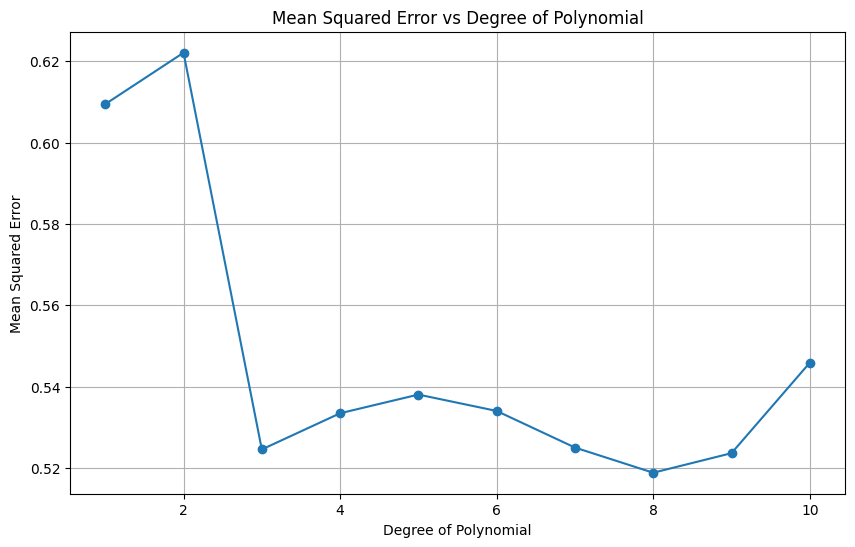

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Auto MPG Dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop Rows with Missing Values
auto_mpg = auto_mpg.dropna()

# Define Features and Target
features = auto_mpg[['Horsepower']] # Only use 'Horsepower' as a feature
target = auto_mpg['MPG']

# List of Polynomial Degrees
degrees = list(range(1, 11)) # Extend degrees to 10

# Split the Dataset into a Training Set and a Test Set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=4)

# List to Store Mean Squared Errors
mse_list = []

for degree in degrees:
    
    # Add Polynomial Features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Create a Linear Regression Model
    model = LinearRegression()
    
    # Train the Model on the Polynomial Features Training Data
    model.fit(X_train_poly, y_train)
    
    # Use the Trained Model to Predict the Target Values in the Test Set
    y_pred = model.predict(X_test_poly)
    
    # Calculate the Mean Squared Error of the Model on the Test Set
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the Mean Squared Error in the List
    mse_list.append(mse)

# Plot the Mean Squared Error as a function of the Degree of the Polynomial
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_list, marker = 'o')
plt.title("Mean Squared Error vs Degree of Polynomial")
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [19]:
auto_mpg

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...
27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


C:\Users\ACER\AppData\Local\Temp\ipykernel_2204\2352878229.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')


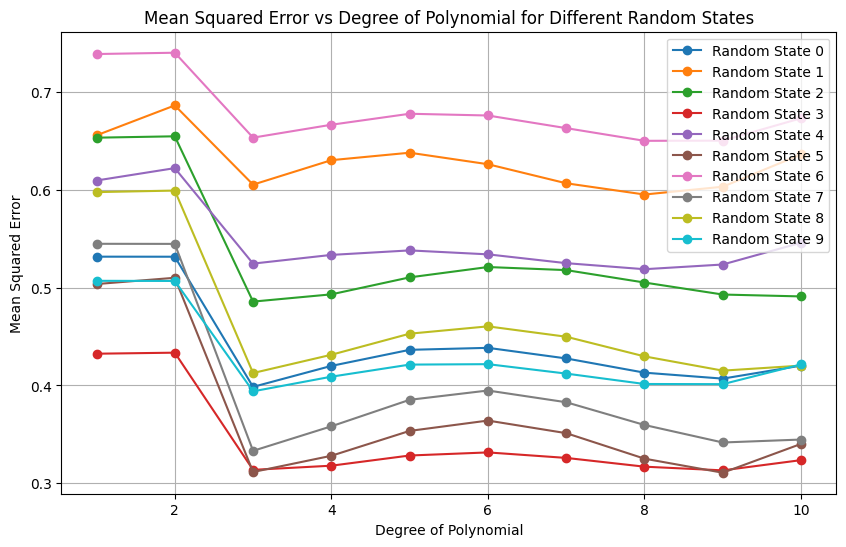

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Auto MPG Dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop Rows with Missing Values
auto_mpg = auto_mpg.dropna()

# Define Features and Target
features = auto_mpg[['Horsepower']] # Only use 'Horsepower' as a feature
target = auto_mpg['MPG']

# List of Polynomial Degrees
degrees = list(range(1, 11)) # Extend degrees to 10

# List of Random States
random_states = list(range(10))

# Create a Plot
plt.figure(figsize=(10,6))

for i, random_state in enumerate(random_states):
    
    # Split the Dataset into a Training Set and a Test Set
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=random_state)
    
    # List to Store Mean Squared Errors
    mse_list = []
    
    for degree in degrees:
        
        # Add Polynomial Features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        # Create a Linear Regression Model
        model = LinearRegression()
        
        # Train the Model on the Polynomial Features Training Data
        model.fit(X_train_poly, y_train)
        
        # Use the Trained model to Predict teh Target Values in the Test Set
        y_pred = model.predict(X_test_poly)
        
        # Calculate the Mean Squared Error of the Model on the Test Set
        mse = mean_squared_error(y_test, y_pred)
        
        # Store the Mean Squared Error in the List
        mse_list.append(mse)
    
    # Plot the Mean Squared Error as a Function of the Degree of the Polynomial for the Current Random State
    plt.plot(degrees, mse_list, marker='o', label=f'Random State {random_state}')

plt.title('Mean Squared Error vs Degree of Polynomial for Different Random States')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Split the Dataset into a Training Set and a Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = DecisionTreeClassifier()

# Train the Model on the Training Data
model.fit(X_train, y_train)

# Use the Trained Model to Predict the Target Values in the Test Set
y_pred_test = model.predict(X_test)

# Calculate the accuracy of the Model on the Training and Test Sets
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Test Accuracy:', accuracy_test)

Test Accuracy: 0.8687142857142857


### Leave One Out Cross Validation (LOOCV)

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score

# Load the Boston Housing Dataset
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# Create a Linear Regression Model
model = LinearRegression()

# Create a LeaveOneOut Cross-Validator
loo = LeaveOneOut()

# Use cross_val_score for the Dataset with the Model and LOOCV
# This will return the Scores for Each Iteration of LOOCV
scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error')

mse_scores = -scores # Invert the Sign of the Scores

# Print the Mean MSE over all LOOCV Iterations
print("Mean MSE:", mse_scores.mean())

Mean MSE: 23.725745519476153


In [23]:
scores

array([-3.72979719e+01, -1.19996083e+01, -1.74878280e+01, -2.37110133e+01,
       -7.04199800e+01, -1.22185247e+01, -1.06607826e-02, -6.08323283e+01,
       -2.76061960e+01, -4.35492529e-04, -1.71891129e+01, -7.57242810e+00,
       -6.52257805e-01, -7.37772576e-01, -1.20890968e+00, -3.73396196e-01,
       -6.92394876e+00, -3.54752744e-01, -1.69701375e+01, -4.35547121e-02,
       -1.20164044e+00, -3.82170339e+00, -4.13536519e-01, -4.99399777e-01,
       -6.33146773e-03, -2.72147161e-01, -1.33111630e+00, -8.65299886e-03,
       -1.36231825e+00, -1.57472599e-02, -1.61151928e+00, -1.31345333e+01,
       -2.06757013e+01, -1.44397569e+00, -4.47571447e-02, -2.46360177e+01,
       -5.59248522e+00, -4.55268647e+00, -3.28660467e+00, -3.31240848e-01,
       -5.01414236e-01, -2.13097952e+00, -9.67926125e-03, -8.52754852e-03,
       -3.10007107e+00, -8.03207324e+00, -1.84421470e-01, -2.15724847e+00,
       -3.10857366e+01, -4.97324456e+00, -2.56665919e+00, -1.24320814e+01,
       -7.23742751e+00, -

In [24]:
X.shape

(506, 13)

### K Fold Cross Validation

### Stratified K Fold